Multilayer Perceptron
===============

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$
$\newcommand{\eqdef}{\equiv}$

This tour details fully connected single layer neural netWorks.

We recommend that after doing this Numerical Tours, you apply it to your
own data, for instance using a dataset from [LibSVM](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/).

_Disclaimer:_ these machine learning tours are intended to be
overly-simplistic implementations and applications of baseline machine learning methods.
For more advanced uses and implementations, we recommend
to use a state-of-the-art library, the most well known being
[Scikit-Learn](http://scikit-learn.org/)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [38]:
#  convert to a column vector
def MakeCol(y): return y.reshape(-1,1)
#  convert to a row vector
def MakeRow(y): return y.reshape(1,-1)
# find non zero/true elements
def find(x): return np.nonzero(x)[0]
# dot product
def dotp(x,y): return sum( x.flatten() * y.flatten() )

Dataset Generation
------------------
We consider a simple 1-D function.


Generate Data $(x_i,y_i)_{i=1}^n$.

In [64]:
n = 256; # #samples
d = 1; # dimension
x = np.linspace(-1,1,n)
y = MakeCol( np.sin(6*np.pi*np.abs(x)**1.5) + np.abs(x)**2 )

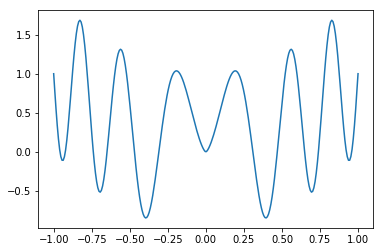

In [65]:
plt.clf
plt.plot(x, y);

Generate the design matrix $X \in \RR^{n \times (d+1)}$ where each row is $(x,1) \in \RR^{d+1}$. The 1 is append to capture the bias in a seamless way.

In [36]:
X = np.hstack(( MakeCol(x), np.ones((n,1)) ))

Multi-Layer Perceptron
--------------------

We consider approximation of the data using functions of the form
$$ f_{A,c}(x) \eqdef \sum_{k=1}^q  c_k \phi( \dotp{x}{a_k} )$$
where $\phi: \RR \rightarrow \RR$ is a non-linear activation function, $q>0$ is the number of neurons, $a_k \in \RR^{d+1}$ are the neurons parameters, and $c_k \in \RR$ the neurons weights. We store these neurons in a matrix $A \in \RR^{(d+1) \times q}$ where each column is a matrix. 

Load the activation function. Here we use an atan sigmoid function.

In [4]:
def phi(x): return 1/(1+np.exp(-x))
def phiD(x): return np.exp(-x)/(1+np.exp(-x))**2

Display the activation.

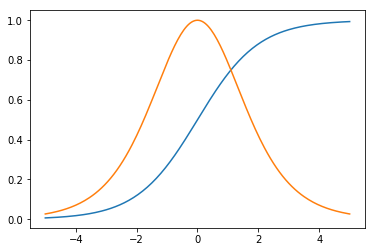

In [7]:
t = np.linspace(-5,5,201)
plt.clf
plt.plot(t, phi(t))
plt.plot(t, phiD(t)/np.max(phiD(t)))
plt.axis('tight');

Using matrix/vector notation, one can re-write the functions as
$$ \Phi(A,c) \eqdef (f_{A,c}(x_i))_{i=1}^n = \phi(XA)c $$
where here $\phi$ is applied component-wise.

In [45]:
def Phi(A,c): return phi(X.dot(A)).dot(c)
def PhiD(A,c): return phiD(X.dot(A)).dot(c);

The function to be minimized for regression is a simple least square
$$ \umin{A,c} \Ee(A,c) \eqdef \frac{1}{2}\sum_{i=1}^n ( f_{A,c}(x_i)-y_i )^2 = \frac{1}{2}\norm{ \phi(XA)c-y }^2.$$

In [228]:
def E(A,c): return 1/(2*n)*np.linalg.norm(Phi(A,c)-y)**2

The function $\Ee$ is convex with respect to $c$, and it is a quadratic function, which gradient is easily computed as
$$ \nabla_c \Ee(A,c) = \phi(XA)^\top ( \phi(XA) c - y ) \in \RR^q$$

In [250]:
def R(A,c): return Phi(A,c)-y;
def nablaEc(A,c): return 1/n * ( phi(X.dot(A)).transpose() ).dot( R(A,c) )

$\Ee$ is however non-convex with respect to $A$, and its gradient reads
$$
  \nabla_A \Ee(A,c) = X^\top (
   \phi'(XA) \odot (R c^\top)
  ) \in \RR^{(q+1) \times q}
  \qwhereq
  R = \phi(XA)c - y.
$$

In [74]:
def nablaEA(A,c): return 1/n * X.transpose().dot( phiD(X.dot(A)) * ( R(A,c).dot(c.transpose()) ) )

Gradient Descent


We first try vanilla gradient descent. Unfortunately, tuning the descent parameter is very hard, so this method is often not succesful. 

Number $q$ of neurons.

In [340]:
q=10;

Implement a gradient descent, which reads
$$ A^{(\ell+1)} \eqdef A^{(\ell)} - \tau_A \nabla_A \Ee(A^{(\ell)}, c^{(\ell)}) \qandq
c^{(\ell+1)} \eqdef c^{(\ell)} - \tau_c \nabla_c \Ee(A^{(\ell)}, c^{(\ell)}).$$
where $(\tau_A,\tau_c)$ are two step size.

Initialize $A$ and $c$.

In [341]:
q = 10 #
A = np.random.randn(d+1,q)*10
c = np.random.randn(q,1)/10

Display initialization.

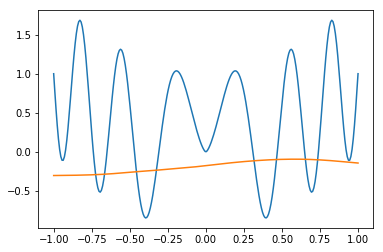

In [342]:
plt.clf
plt.plot(x, y)
plt.plot(x, Phi(A,c));

Implement the gradient descent.

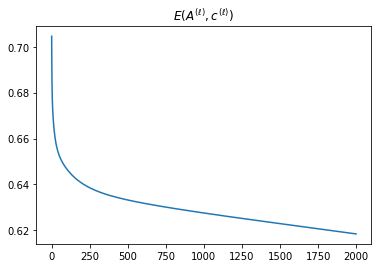

In [344]:
q = 20
A = np.random.randn(d+1,q)*10
c = np.random.randn(q,1)/10
niter = 2000
Elist = np.zeros((niter,1))
tauA = .2/2
tauc = .2
for it in np.arange(0,niter):
    Elist[it] = E(A,c)
    gA = nablaEA(A,c)
    gc = nablaEc(A,c)
    A = A - tauA*gA
    c = c - tauc*gc
plt.clf
plt.plot(np.sqrt(2*Elist))
plt.title('$E(A^{(\ell)}, c^{(\ell)})$');

Display the resulting fit.

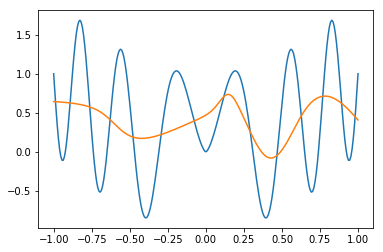

In [345]:
plt.clf
plt.plot(x, y)
plt.plot(x, Phi(A,c));

Quasi-Newton (BFGS) Solver
--------------------

Create callback functions.

In [346]:
def BFGSfunc(u): 
    A = u[0:q*(d+1)].reshape((d+1),q)
    c = MakeCol( u[q*(d+1):] )
    return E(A,c); # 1/2*np.linalg.norm(c)**2
def nablaBFGSfunc(u):
    A = u[0:q*(d+1)].reshape((d+1),q)
    c = MakeCol( u[q*(d+1):] )
    gc = nablaEc(A,c).flatten()
    gA = nablaEA(A,c).flatten()
    return np.concatenate((gA, gc), axis=0)

Initialization

In [347]:
A = np.random.randn(d+1,q)
c = np.random.randn(q,1)
u = np.concatenate((A.flatten(), c.flatten()), axis=0)

Run BFGS

In [354]:
from scipy.optimize import minimize
res = minimize(BFGSfunc, u, method='BFGS', jac=nablaBFGSfunc, options={'gtol': 1e-6, 'disp': True, 'maxiter': 600});
u = res.x
A = u[0:q*(d+1)].reshape((d+1),q)
c = MakeCol( u[q*(d+1):] )

         Current function value: 0.000338
         Iterations: 600
         Function evaluations: 635
         Gradient evaluations: 635


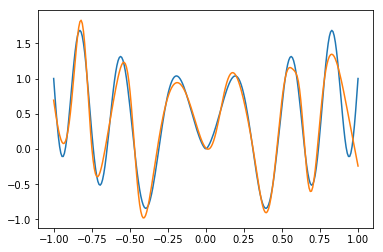

In [353]:
plt.clf
plt.plot(x, y)
plt.plot(x, Phi(A,c));

**Exercise:** try with an increasing number of neurons.